In [3]:
import pylearn2.utils
import pylearn2.config
import theano
import neukrill_net.dense_dataset
import neukrill_net.utils
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
#import holoviews as hl
#%load_ext holoviews.ipython
import sklearn.metrics
m = pylearn2.utils.serial.load(
    "/disk/scratch/neuroglycerin/models/quicker_learning_onelessbig_layer_experiment.pkl")

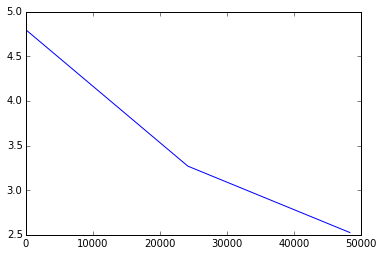

In [7]:
channel = m.monitor.channels["valid_y_y_1_nll"]
plt.plot(channel.example_record,channel.val_record)

In [8]:
m = pylearn2.utils.serial.load(
    "/disk/scratch/neuroglycerin/models/quicker_learning_onelessbig_layer_experiment_recent.pkl")

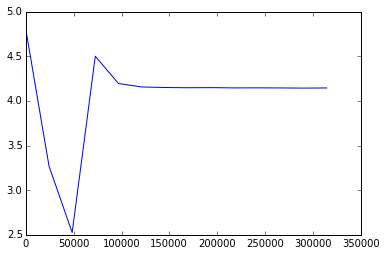

In [9]:
channel = m.monitor.channels["valid_y_y_1_nll"]
plt.plot(channel.example_record,channel.val_record)

We are having some problems around epoch 10.

In [8]:
m = pylearn2.utils.serial.load(
    "/disk/scratch/neuroglycerin/models/quicker_learning_1_fc_layer_experiment_recent.pkl")

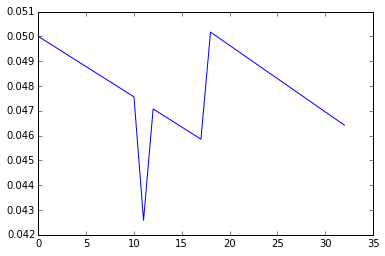

In [37]:
channel = m.monitor.channels["learning_rate"]
plt.plot(channel.val_record)

Learning rate is not the cause.

In [40]:
cs = [c for c in m.monitor.channels if "norm" in c]

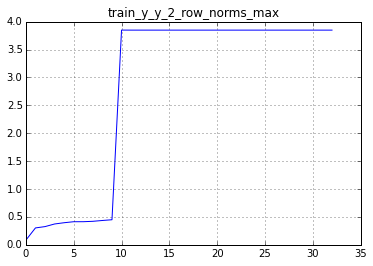

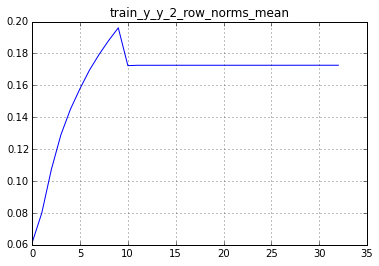

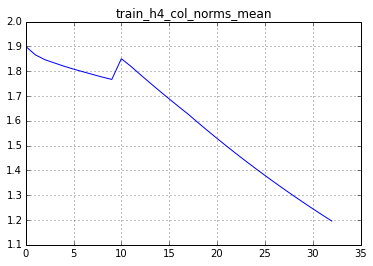

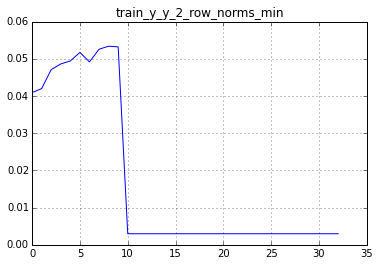

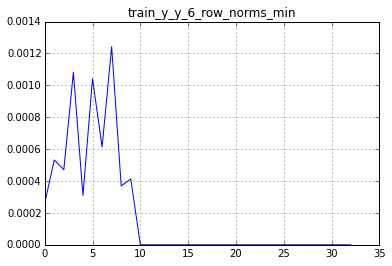

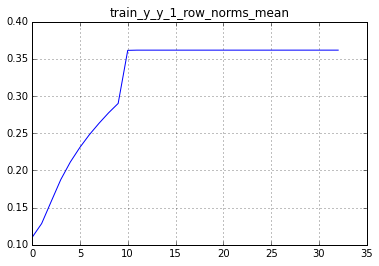

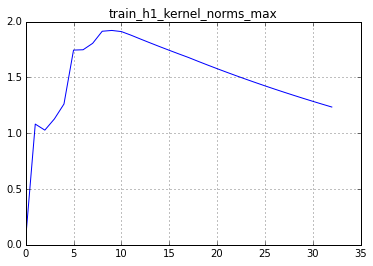

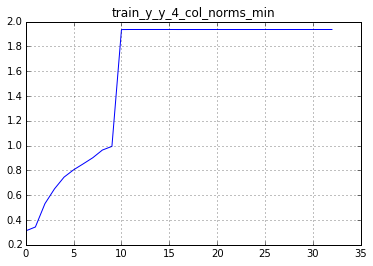

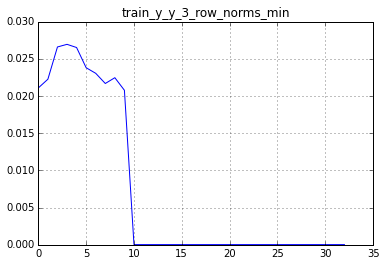

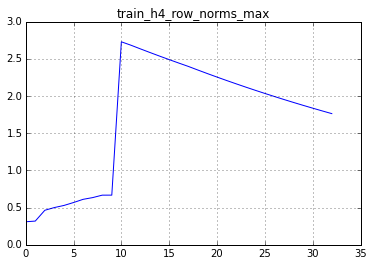

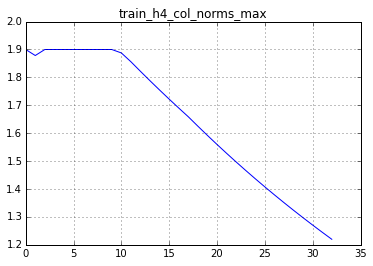

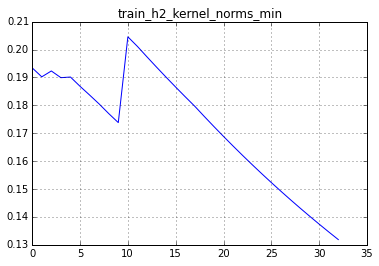

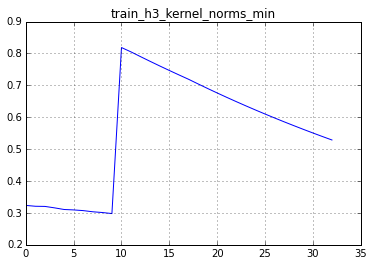

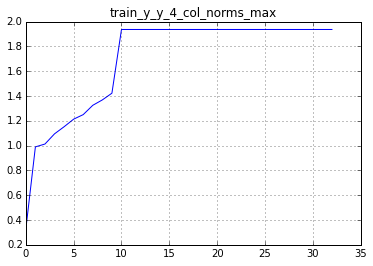

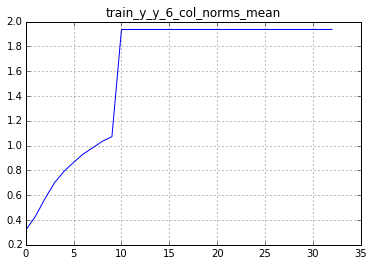

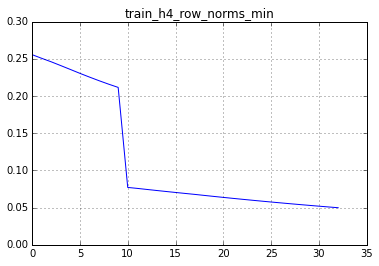

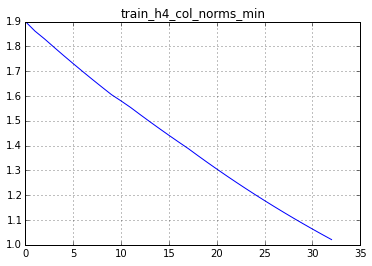

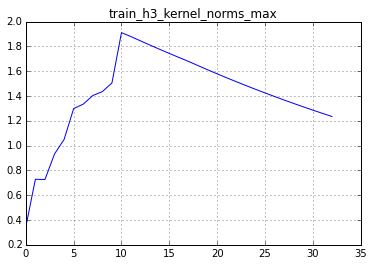

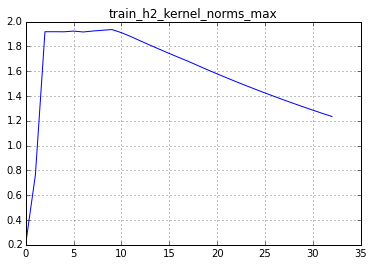

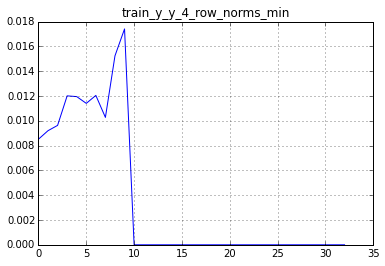

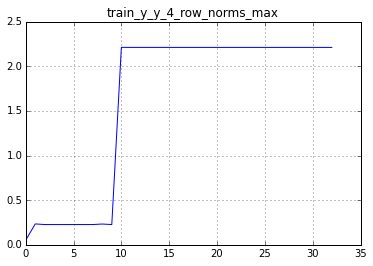

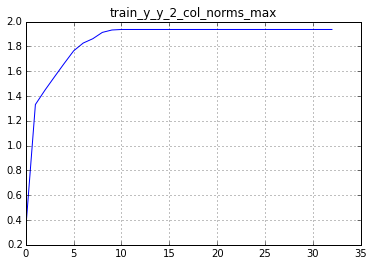

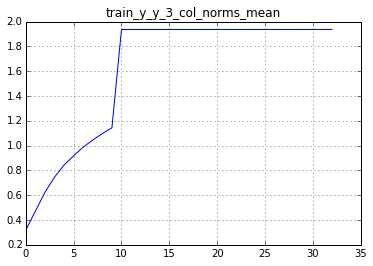

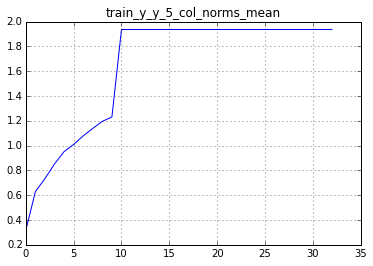

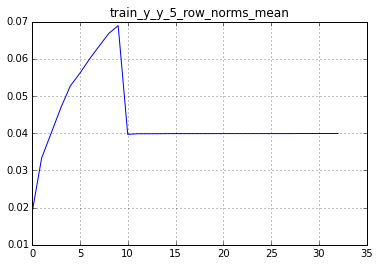

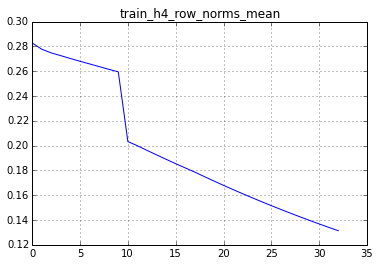

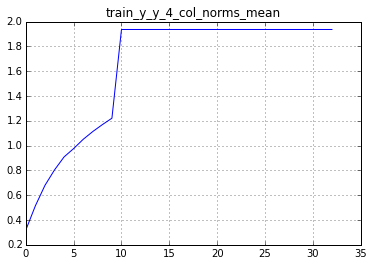

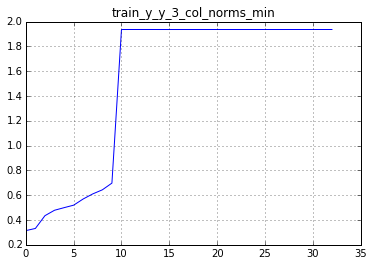

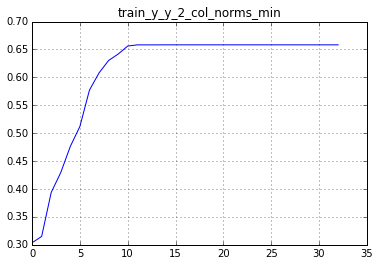

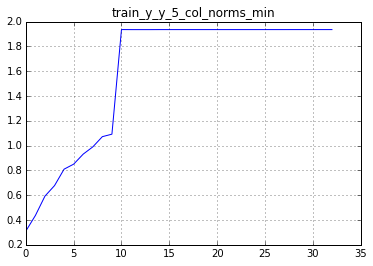

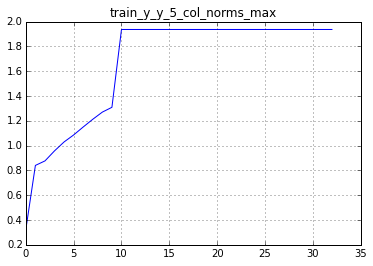

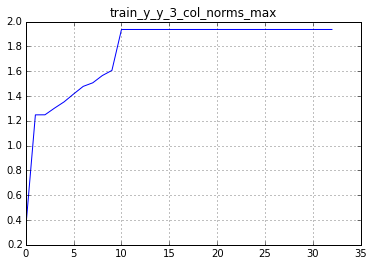

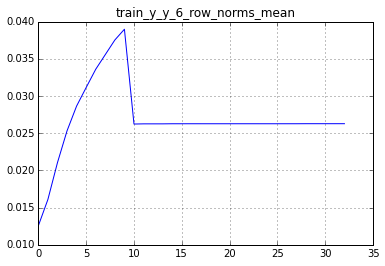

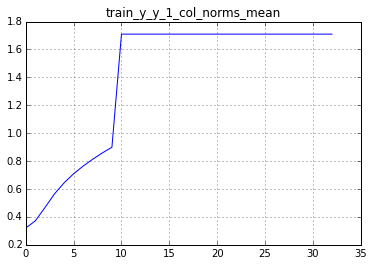

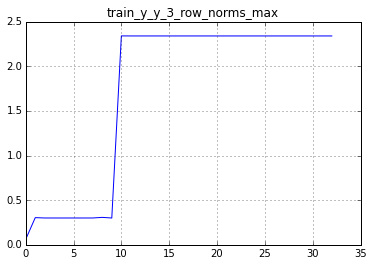

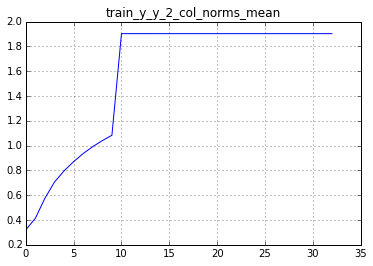

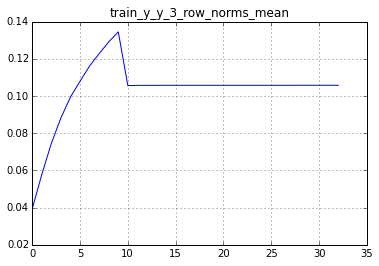

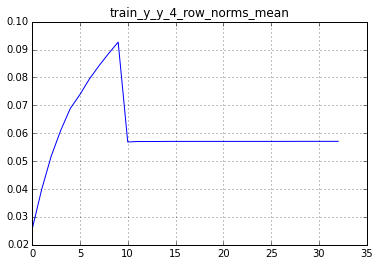

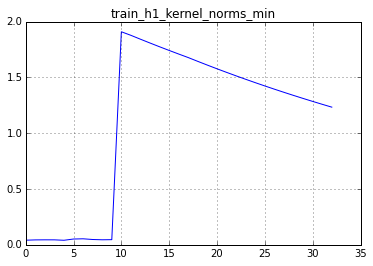

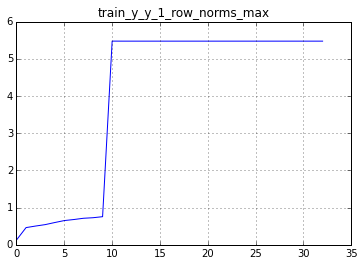

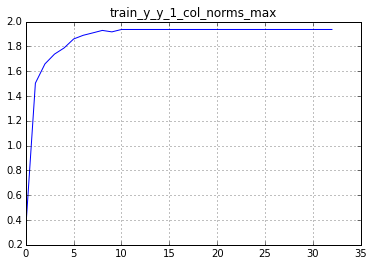

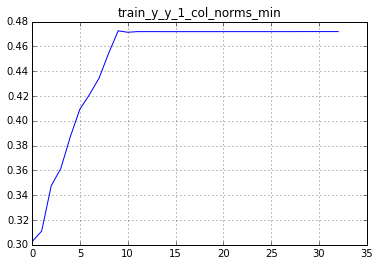

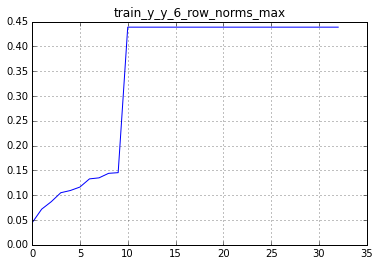

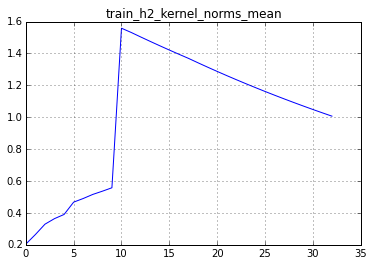

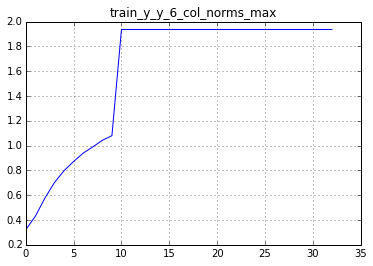

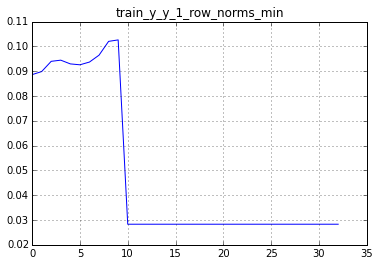

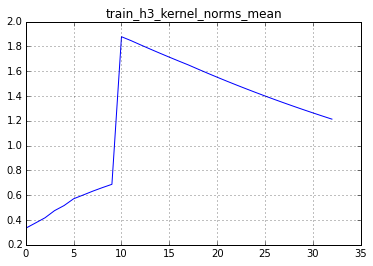

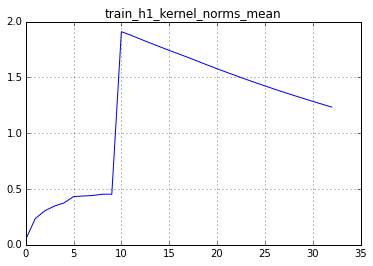

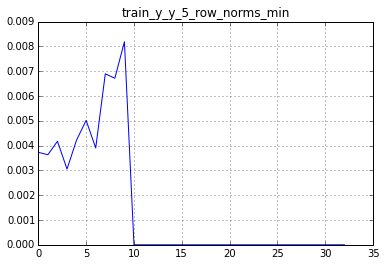

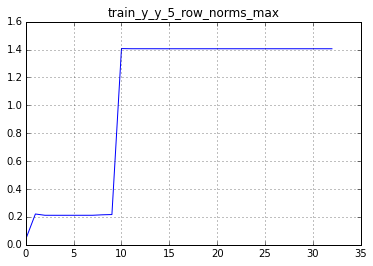

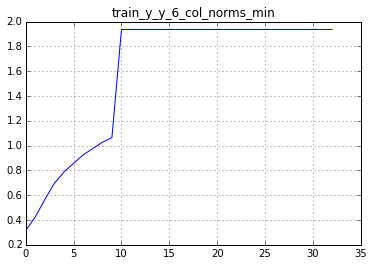

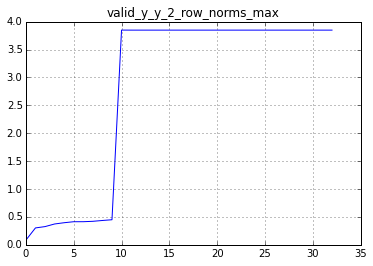

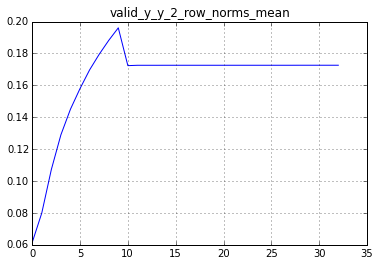

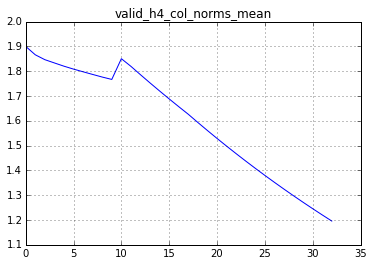

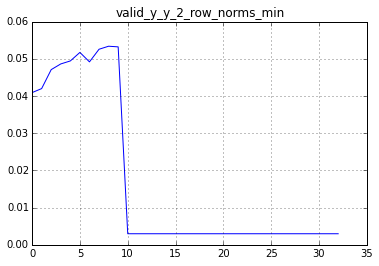

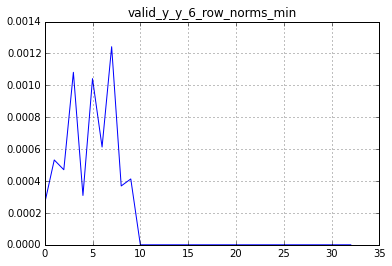

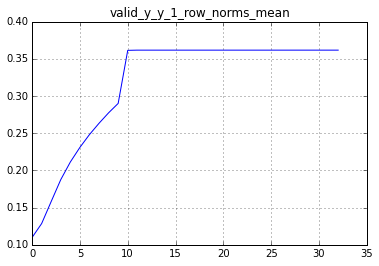

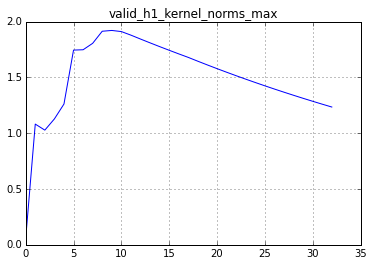

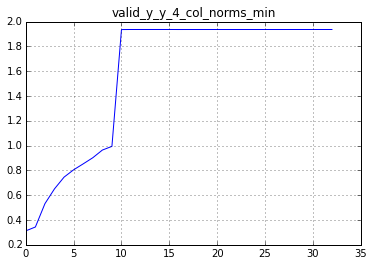

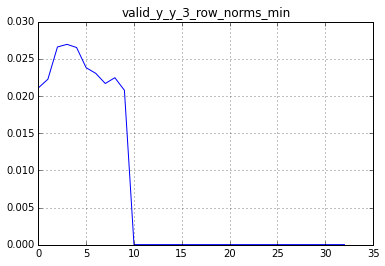

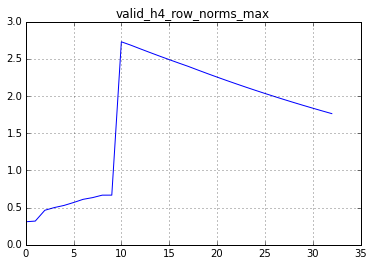

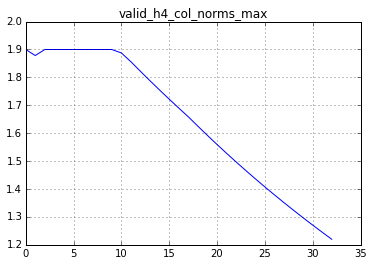

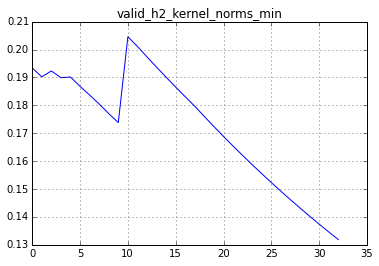

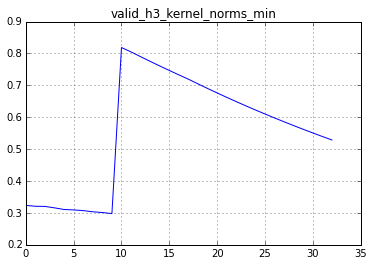

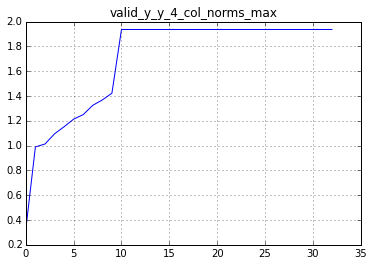

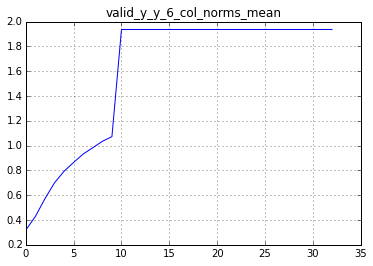

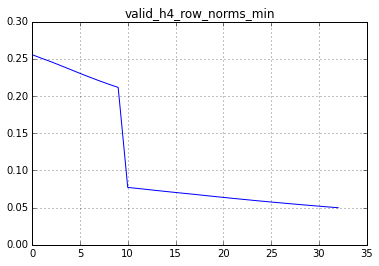

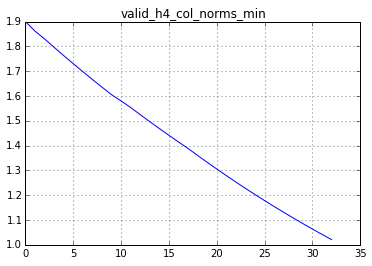

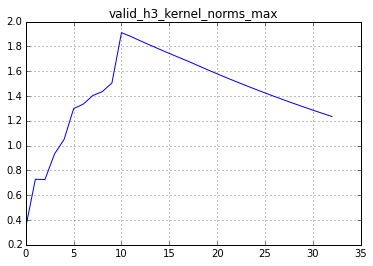

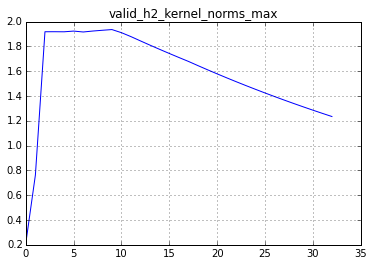

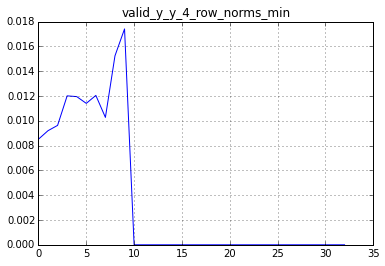

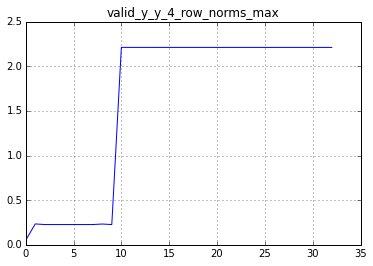

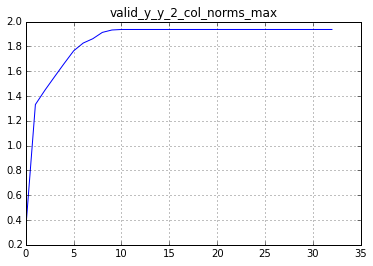

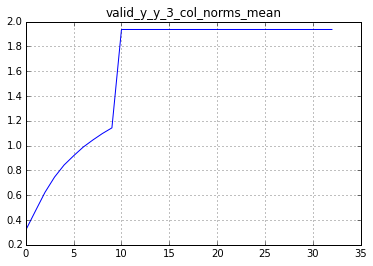

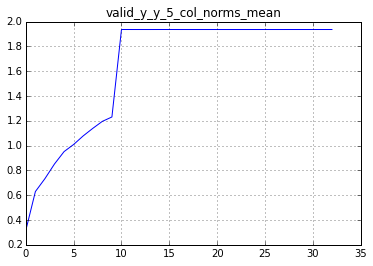

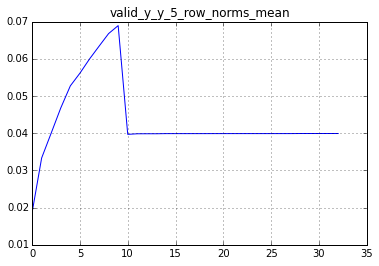

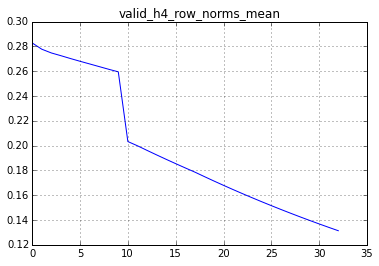

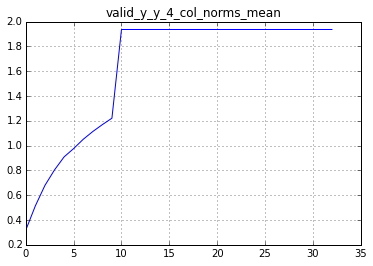

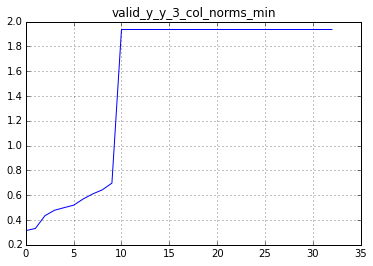

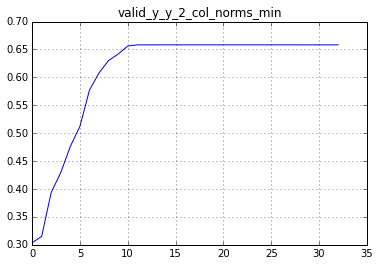

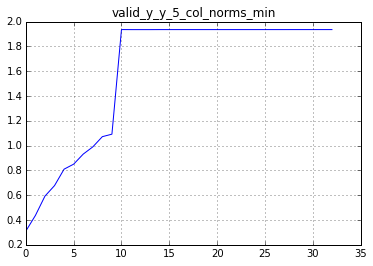

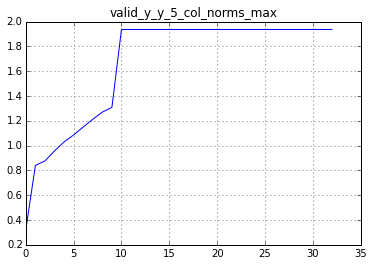

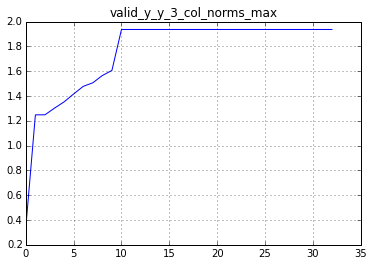

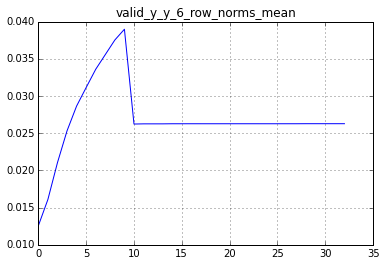

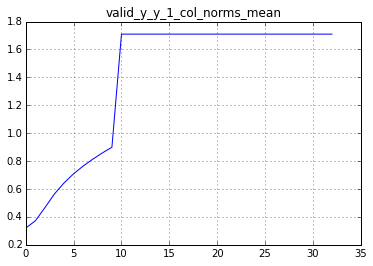

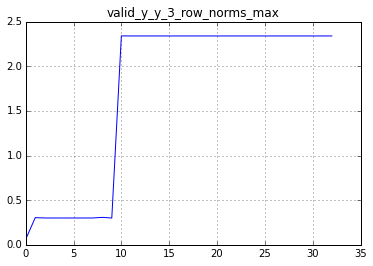

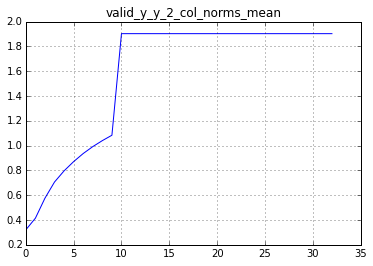

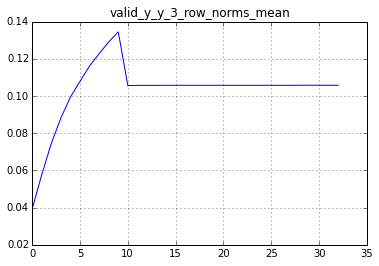

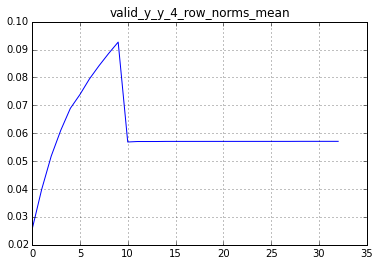

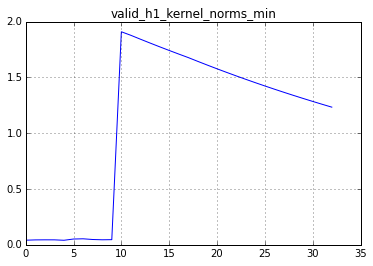

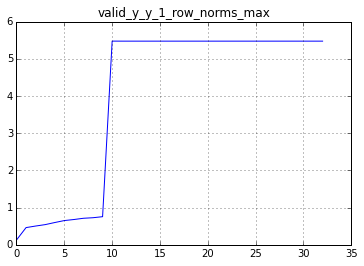

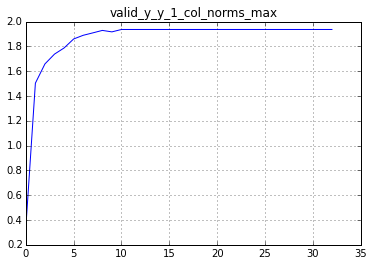

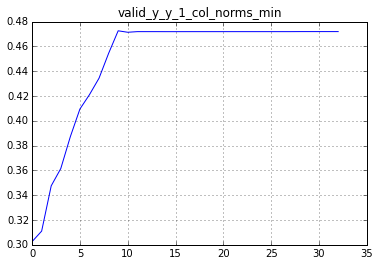

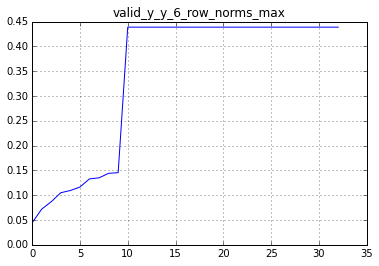

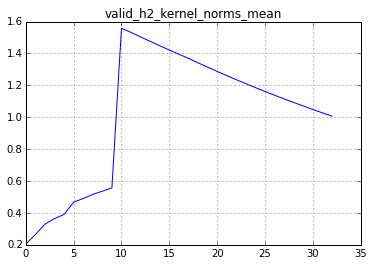

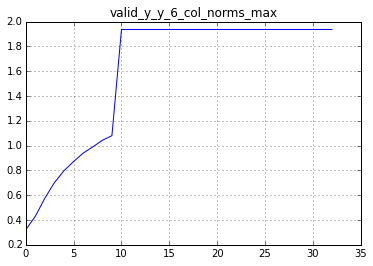

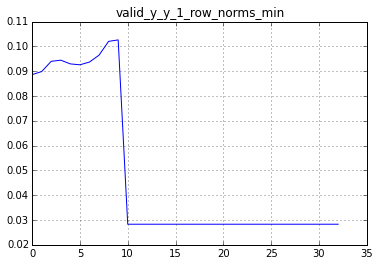

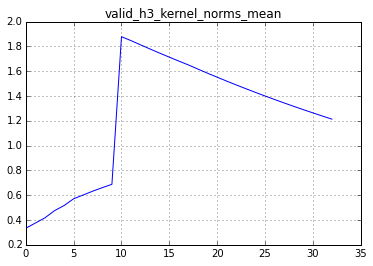

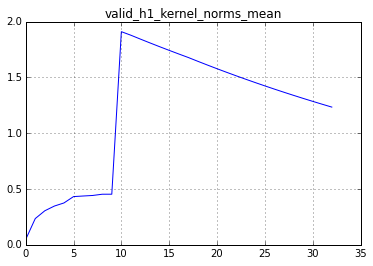

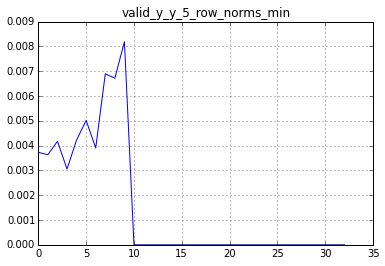

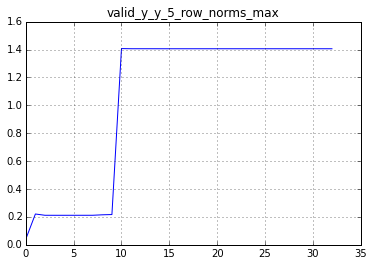

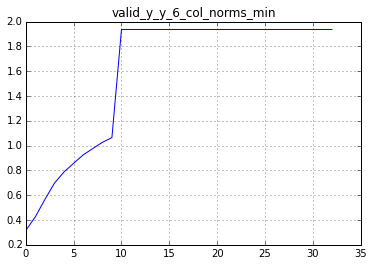

In [41]:
for c in cs:# m.monitor.channels:
    channel = m.monitor.channels[c]
    plt.title(c)
    plt.plot(channel.val_record)
    plt.grid(True)
    plt.show()

In [28]:
vals_at_e10 = [(c, [float(v) for v in m.monitor.channels[c].val_record[8:12]]) for c in cs]
print(vals_at_e10)

[('train_h1_max_x_max_u', [10.039595603942871, 9.890149116516113, 76.78614807128906, 76.73640441894531]), ('train_h2_max_x_max_u', [12.560083389282227, 13.801111221313477, 1.5983177423477173, 1.553060531616211]), ('train_h4_max_x_max_u', [8.554431915283203, 9.040616989135742, 0.0, 0.0]), ('train_h3_max_x_max_u', [7.563226699829102, 9.106705665588379, 21.176692962646484, 21.17508316040039]), ('valid_h1_max_x_max_u', [10.555604934692383, 10.378471374511719, 76.78620910644531, 76.73628234863281]), ('valid_h2_max_x_max_u', [13.113805770874023, 15.04285717010498, 1.5983185768127441, 1.5530626773834229]), ('valid_h4_max_x_max_u', [9.473014831542969, 10.9691801071167, 0.0, 0.0]), ('valid_h3_max_x_max_u', [7.679872989654541, 10.181827545166016, 21.176719665527344, 21.175033569335938])]


Going to change max_kernel_norm in convolutional layers to 0.5 to see if it explains the failure on epoch 10.

In [64]:
m = pylearn2.utils.serial.load(
    "/disk/scratch/neuroglycerin/models/experiment_maxkernelnorm_recent.pkl")

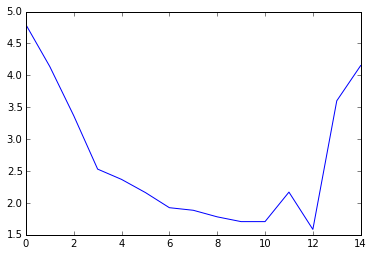

In [65]:
channel = m.monitor.channels["valid_y_y_1_nll"]
plt.plot(channel.val_record)

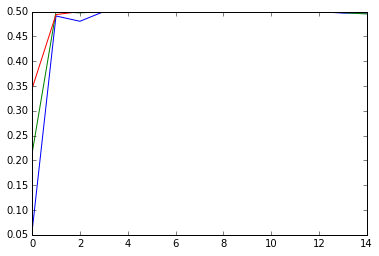

In [51]:
channel = m.monitor.channels["train_h1_kernel_norms_max"]
plt.plot(channel.val_record)
channel = m.monitor.channels["train_h2_kernel_norms_max"]
plt.plot(channel.val_record)
channel = m.monitor.channels["train_h3_kernel_norms_max"]
plt.plot(channel.val_record)

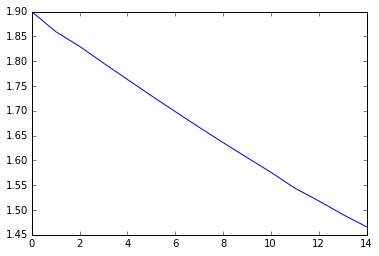

In [68]:
channel = m.monitor.channels["train_h4_col_norms_min"]
plt.plot(channel.val_record)

Things broke again once kernel_norms_max on convolutional layers reached 0.5, it seems.

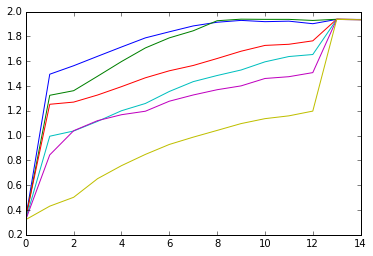

In [59]:
channel = m.monitor.channels["train_y_y_1_col_norms_max"]
plt.plot(channel.val_record)
channel = m.monitor.channels["train_y_y_2_col_norms_max"]
plt.plot(channel.val_record)
channel = m.monitor.channels["train_y_y_3_col_norms_max"]
plt.plot(channel.val_record)
channel = m.monitor.channels["train_y_y_4_col_norms_max"]
plt.plot(channel.val_record)
channel = m.monitor.channels["train_y_y_5_col_norms_max"]
plt.plot(channel.val_record)
channel = m.monitor.channels["train_y_y_6_col_norms_max"]
plt.plot(channel.val_record)

We now think that the col_norms in the fully connected layer is set wrongly with the initial weights (set by ist_dev). And apparently kernel_norms in the convolutional layers is like the same thing. The practical advice we found is to set the col_norms_max to 80% of the value of the col_norms_mean value we saturate at without specifying the max.

This is the model with bigger 1st convolutional layer (128 output channels) and changed decay factor (which didn't actually do something i wanted it to). It is primarily being kept running to evaluate the importance of big conv layer.

In [69]:
m = pylearn2.utils.serial.load(
    "/disk/scratch/neuroglycerin/models/experiment_biglayer_largedecay_recent.pkl")

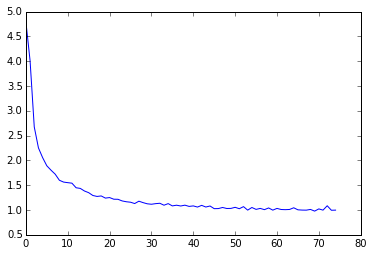

In [54]:
channel = m.monitor.channels["valid_y_y_1_nll"]
plt.plot(channel.val_record)

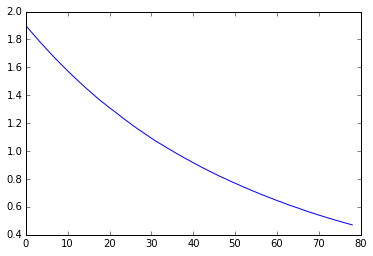

In [72]:
channel = m.monitor.channels["train_h4_col_norms_min"]
plt.plot(channel.val_record)

In [60]:
m = pylearn2.utils.serial.load(
    "/disk/scratch/neuroglycerin/models/experiment_biglayer_largedecay.pkl")

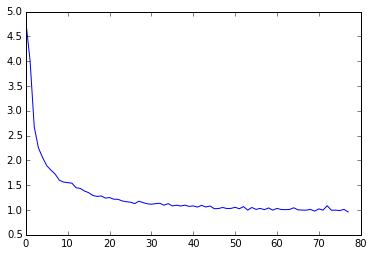

In [61]:
channel = m.monitor.channels["valid_y_y_1_nll"]
plt.plot(channel.val_record)